Number of faces detected: 1


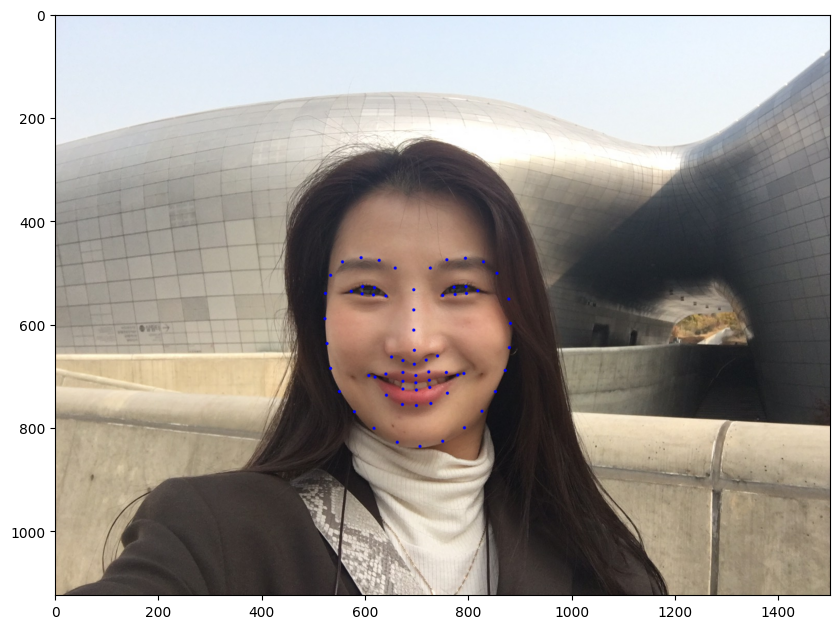

In [1]:
import numpy as np
import dlib
import cv2
import matplotlib.pyplot as plt

def landmark():
    RIGHT_EYE = list(range(36, 42))
    LEFT_EYE = list(range(42, 48))
    MOUTH = list(range(48, 68))
    NOSE = list(range(27, 36))
    EYEBROWS = list(range(17, 27))
    JAWLINE = list(range(1, 17))
    ALL = list(range(0, 68))
    EYES = list(range(36, 48))

    #-- 데이터 파일과 이미지 파일 경로
    predictor_file = 'shape_predictor_68_face_landmarks.dat' #-- 자신의 개발 환경에 맞게 변경할 것
    image_file = 'face.jpg' #-- 자신의 개발 환경에 맞게 변경할 것

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_file)

    image = cv2.imread(image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    rects = detector(gray, 1)
    print("Number of faces detected: {}".format(len(rects)))

    for (i, rect) in enumerate(rects):
        points = np.matrix([[p.x, p.y] for p in predictor(gray, rect).parts()])
        show_parts = points[ALL]
        for (i, point) in enumerate(show_parts):
            x = point[0,0]
            y = point[0,1]
            # 점의 크기를 키우고, 색상을 변경합니다. (예: 빨간색으로 변경)
            cv2.circle(image, (x, y), 3, (255, 0, 0), -1)  # 크기를 3으로 변경, 색상을 빨간색으로 변경

            # 점에다가 숫자 붙이는 코드
            # cv2.putText(image, "{}".format(i + 1), (x, y - 2),
            # cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)

    # 이미지를 저장합니다.
    cv2.imwrite('output.jpg', image)

    # 위의 두 줄을 아래의 코드로 대체합니다.
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
landmark()